In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df1 = pd.read_csv("winemag-data-130k-v2.csv")
df2 = pd.read_csv("winemag-data_first150k.csv")

In [3]:
df1.head()
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df1.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [5]:
df2.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [10]:
df1.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [12]:
df2.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [6]:
drop_c = ['Unnamed: 0','description','title','taster_name','taster_twitter_handle','region_2']

df1.drop(columns = [c for c in drop_c if c in df1.columns],inplace=True)
df2.drop(columns = [c for c in drop_c if c in df2.columns],inplace=True)

In [7]:
df1 = df1[df1['price'].notnull()]
df2 = df2[df2['price'].notnull()]

In [8]:
df = pd.concat([df1,df2],ignore_index=True)
print(df.shape)

(258210, 8)


In [11]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()

cat_cols, num_cols

(['country', 'designation', 'province', 'region_1', 'variety', 'winery'],
 ['points', 'price'])

In [12]:
df[cat_cols] = df[cat_cols].fillna('unknown')

In [13]:
df = df[df['price'] < 500]

In [14]:
for col in cat_cols:
    freq_map = df[col].value_counts()
    df[col] = df[col].map(freq_map)

In [15]:
X = df.drop('price', axis=1)
y = df['price']


In [16]:
y = np.log1p(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [20]:
y_pred = rf.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R2 Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


R2 Score : 0.8022
MAE      : 0.1955
RMSE     : 0.2804


In [22]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
2,points,0.447762
4,region_1,0.124696
6,winery,0.114577
5,variety,0.102782
1,designation,0.080389
0,country,0.072167
3,province,0.057627


In [24]:
!pip install xgboost lightgbm shap flask fastapi uvicorn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.2.0 requires pandas!=1.4.0,<2,>1.1, but you have pandas 2.3.1 which is incompatible.
ydata-profiling 4.2.0 requires pydantic<2,>=1.8.1, but you have pydantic 2.12.5 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 547.0/547.0 kB 1.2 MB/s eta 0:00:00
     ------------------------------------ 103.1/103.1 kB 457.4 kB/s eta 0:00:00
     -------------------------------------- 68.5/68.5 kB 534.5 kB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 74.0/74.0 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 463.6/463.6 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 38.1/38.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.9
    Uninstalling pydantic-1.10.9:
      Successfully uninstalled pydantic-1.10.9


In [25]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import xgboost as xgb
import lightgbm as lgb
import shap
import joblib


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [27]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost R2: 0.6852094535428133


In [28]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

print("LightGBM R2:", r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 206412, number of used features: 7
[LightGBM] [Info] Start training from score 3.318229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM R2: 0.6660427780962108


In [29]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.03, 0.05],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_


In [30]:
y_pred_best = best_xgb.predict(X_test)

print("Best XGB R2:", r2_score(y_test, y_pred_best))
print("RMSE:", mean_squared_error(y_test, y_pred_best, squared=False))


Best XGB R2: 0.7324811792387205
RMSE: 0.32610224857231834


In [31]:
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)


100%|===================| 51590/51604 [37:08<00:00]        

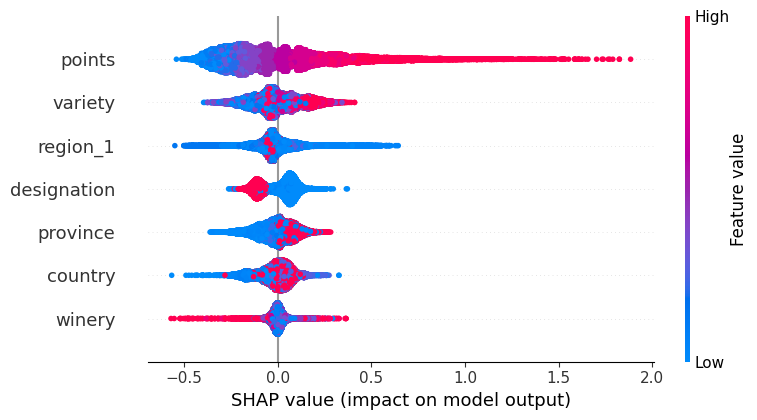

In [32]:
shap.summary_plot(shap_values, X_test)

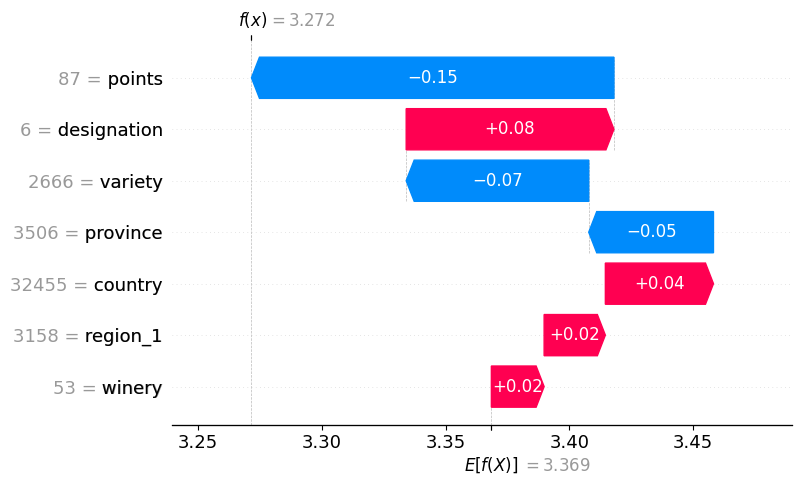

In [33]:
shap.plots.waterfall(shap_values[0])

In [34]:
joblib.dump(best_xgb, "wine_price_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']